In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [19]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))
       

In [20]:
def propagation(b,X_hat,y_hat):
    N=X_hat.shape[0]
    z=np.dot(X_hat,b)
    s=sigmoid(z)
    temp=-(y_hat*np.log(s+0.001)+(1-y_hat)*np.log(1-s+0.001))
    L= np.mean(temp,axis=0,keepdims=True)
    x1=sigmoid(z)-y_hat
    dL= 1/N*np.dot(x1.T,X_hat)
    propagate={"L":L,"dL":dL}
    return propagate

+ In this section you need to update weight b by gradient descent based on the training data X_hat and y_hat.
+ In his pice of code, dl is the derivative of loss with respect to weight matrix b.
+ Fill None parts in the code.
 

In [33]:
def update(b,X_hat,y_hat,eta):
    dl=propagation(b,X_hat,y_hat)["dL"].T
    update=b-eta*dl
    return update

In [34]:
def init(m,n,method):
    if method=='zero':
        b=np.zeros((m,n))
    elif method=='random':
        b=np.random.randn(m,n)
    else:
        raise Exception('Choose correct method: zero or random')
    return b

In [35]:
def b_opt(X_hat,y_hat,eta,steps,initialization):
    N=X_hat.shape[0]
    p=X_hat.shape[1]
    b=init(p,1,initialization)
    for i in range(steps):       
        b1=update(b,X_hat,y_hat,eta)
        b=update(b1,X_hat,y_hat,eta)
        loss=propagation(b,X_hat,y_hat)["L"]
        if i%10 == 0:
            print ("Loss after iteration %i= %f" %(i, loss))
            
    return b


# 2
+ In this section based on the probability of the output in the binary classifier algorithm, complete the code by filling the None parts.

In [36]:
def predict(x,X_hat,y_hat,eta,steps=20):
    b_optimal=b_opt(X_hat,y_hat,eta,steps,'random')
    z=np.dot(x.T,b_optimal)
    prob=sigmoid(z)
    if None:
        return 1
    else:
        return 0

In [37]:
def predict2(x,X_train,y_train,eta,steps,initialization):
    N=X_train.shape[0]
    one=np.ones((N,1))
    X_hat=np.concatenate((one,X_train),axis=1)
    b_optimal=b_opt(X_hat,y_train,eta,steps,initialization)
    xnew=np.append(1,x).reshape(-1,1)
    z=np.dot(xnew.T,b_optimal)
    prob=sigmoid(z)
    if None:
        return 1
    else:
        return 0

## Making Data for Binary Classifier

In [38]:
def making_data(n_sample,shape_type):
    ratio=2*np.pi/n_sample
    t=np.arange(0,2*np.pi,ratio)
    
    if shape_type=='circle':
        noise=np.random.randn(t.shape[0])/8
        x1=np.sin(t)
        y1=np.cos(t)+noise
        noise2=np.random.randn(t.shape[0])/8
        x2=1.5*np.sin(t)
        y2=1.5*np.cos(t)+noise2
    elif shape_type=='wave':
        noise=np.random.randn(t.shape[0])/2
        x1=t
        y1=np.cos(2*t)+noise
        noise2=np.random.randn(t.shape[0])/2
        x2=t
        y2=1.5*np.cos(2*t)+2+noise2
    elif shape_type=='linear':
        noise=np.random.randn(t.shape[0])
        x1=t
        y1=t+noise
        noise2=np.random.randn(t.shape[0])
        x2=t
        y2=t+3+noise2
    elif shape_type=='cluster':
        noise=np.random.randn(t.shape[0])/3
        x1=noise*np.cos(t)
        y1=noise*np.sin(t)+noise
        noise2=np.random.randn(t.shape[0])/3
        x2=noise2*np.cos(t)+1
        y2=noise2*np.sin(t)+1.5+noise2
    elif shape_type=='lorenz':
        rot=(lambda theta:np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) )
        noise=np.random.randn(t.shape[0])/4
        x01=noise*np.cos(t)
        y01=3*noise*np.sin(t)
        xy0=np.array([[x01,y01]]).T
        xy=np.dot(rot(np.pi/4),xy0)
        x1=xy[0,:,:]
        y1=xy[1,:,:]
        noise2=np.random.randn(t.shape[0])/4
        x02=noise2*np.cos(t)+1
        y02=3*noise2*np.sin(t)+1.5
        xy02=np.array([[x02,y02]]).T
        xy2=np.dot(rot(-np.pi/4),xy02)
        x2=xy2[0,:,:]
        y2=xy2[1,:,:]
    else:
        raise Exception('Insert true shape name: circle or crescent or linear or wave or cluster or lorenz')
            
    xy_red=np.column_stack((x1,y1))
    l_red=np.ones((xy_red.shape[0],1)).astype(int)
    red=np.column_stack((xy_red,l_red))
    xy2_red=np.column_stack((x2,y2))
    l_blue=np.zeros((xy2_red.shape[0],1)).astype(int)
    blue=np.column_stack((xy2_red,l_blue))
    total=np.concatenate([red,blue])
    X=total[:,:2]
    y=[item[0] for item in total[:,2:]]
    y=np.array(y).astype(int)
    
    return X, y
    

In [39]:
def plot_data(X,y):
    df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {1:'red', 0:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    return plt.show()

# Split Data

In [40]:
def split(X,y,ratio):
    total=np.column_stack((X,y))
    np.random.shuffle(total)
    M=int(X.shape[0]*ratio)
    X=total[:,:2]
    y=total[:,2]
    y=y.reshape(-1,1)
    train_X, test_X=X[:M], X[M:]
    train_y, test_y=y[:M], y[M:]
    return train_X, test_X, train_y, test_y

In [41]:
def plot_decision_boundary(X,y,ratio,filename):
    train_X, test_X, train_y, test_y=split(X,y,ratio)
    one=np.ones((train_X.shape[0],1))
    xhat=np.column_stack([one, train_X])
    yhat=train_y
    yhat=yhat.reshape(-1,1)
    w=b_opt(xhat,yhat,0.5,10,'random')
    x1=np.arange(np.min(X[:,0]),np.max(X[:,0]),0.01)
    x2=-w[1]/w[2]*x1-w[0]/w[2]
    y.reshape(-1,)
    df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {1:'red', 0:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    plt.plot(x1,x2,'go-')
    plt.savefig(filename,dpi=400)
    return plt.show()

In [42]:
X1, y1=making_data(500,'linear')
X2, y2=making_data(500,'cluster')
X3, y3=making_data(500,'circle')
X4, y4=making_data(500,'wave')
X5, y5=making_data(500,'lorenz')

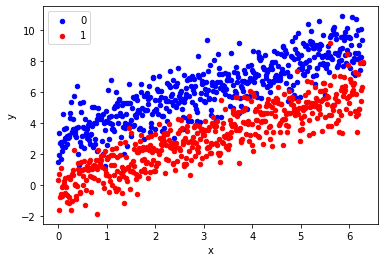

In [43]:
plot_data(X1,y1)

Loss after iteration 0= 1.404979


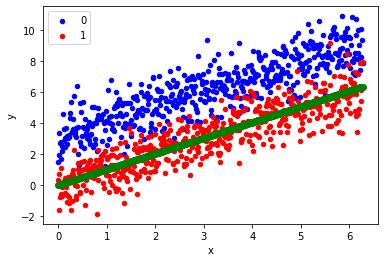

In [44]:
plot_decision_boundary(X1,y1,0.8,"HD1.jpg")

# 3
+ Plot decision boundary for (X2,y2) with learning rate=0.01
+ Plot decision boundary for (X3,y3) with learning rate=0.1
+ Plot decision boundary for (X4,y4) with learning rate=0.5
+ Plot decision boundary for (X5,y5) with learning rate=0.0001